# Homework 4 & 5
CSE 142 - Machine Learning

Adrian Murillo

December 16th

## Kernel Methods with Noisy Setting

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn import svm
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

test_size = 1000

In [2]:
co_p = np.random.normal(1,1,size=(1000+test_size,2))
co_n = np.random.normal(1,1,size=(1000+test_size,2))

X_p = pd.DataFrame(co_p,columns=['x0','x1'])
X_n = pd.DataFrame(co_n,columns=['x0','x1'])

In [3]:
X_p

x0        x1
0     0.305146  1.062899
1    -0.018889  0.814492
2     1.216996  0.839411
3     0.821148  0.712794
4     1.161654  1.085277
...        ...       ...
1995  1.099644 -0.083348
1996  1.514581 -0.901274
1997  0.428933  1.245834
1998  1.508398  1.204403
1999  1.284503  0.629230

[2000 rows x 2 columns]

In [4]:
X_n

x0        x1
0     1.908355  2.130308
1     0.816929  1.132618
2     1.066714  1.887439
3     1.062985  1.274314
4     0.180341  1.755488
...        ...       ...
1995  1.486466  0.610556
1996  0.531134  2.840262
1997  1.142206  1.501292
1998  1.091356  1.812898
1999  2.903780  1.533130

[2000 rows x 2 columns]

### (a) Simple RBF Kernel

In [5]:
mean = 0
for i in range(0,20):
    
    # Flipping Labels
    y_p = np.full(1000+test_size,1)
    y_n = np.full(1000+test_size,-1)
    for j in range(0,len(y_p)):
        y_p[j] = 1 if (random.randint(0,100)>35) else -1
    for j in range(0,len(y_n)):
        y_n[j] = -1 if (random.randint(0,100)>20) else 1
        
    # Constructing Dataframe
    df_p = pd.concat([X_p,pd.DataFrame(y_p,columns=['y'])],1)
    df_n = pd.concat([X_n,pd.DataFrame(y_n,columns=['y'])],1)
    df  = pd.concat([df_p,df_n],0)
    
    # Running SVM
    clf_a = svm.SVC(kernel='rbf', C=1, gamma=0.01)
    clf_a.fit(df[['x0','x1']][:1000],df['y'][:1000])
    score = clf_a.score(df[['x0','x1']][1000:],df['y'][1000:])
    
    # Report Scores
    print(score)
    mean +=score
    
mean = mean/20
mean

0.35033333333333333
0.33766666666666667
0.356
0.35333333333333333
0.3473333333333333
0.3596666666666667
0.35833333333333334
0.3423333333333333
0.35133333333333333
0.3396666666666667
0.36033333333333334
0.357
0.3473333333333333
0.348
0.344
0.3423333333333333
0.36633333333333334
0.348
0.362
0.3496666666666667


0.35105

### (b) K-Nearest Neighbor

In [6]:
mean = 0
for i in range(0,20):
    
    # Flipping Labels
    y_p = np.full(1000+test_size,1)
    y_n = np.full(1000+test_size,-1)
    for j in range(0,len(y_p)):
        y_p[j] = 1 if (random.randint(0,100)>35) else -1
    for j in range(0,len(y_n)):
        y_n[j] = -1 if (random.randint(0,100)>20) else 1
        
    # Constructing Dataframe
    df_p = pd.concat([X_p,pd.DataFrame(y_p,columns=['y'])],1)
    df_n = pd.concat([X_n,pd.DataFrame(y_n,columns=['y'])],1)
    df  = pd.concat([df_p,df_n],0)
    
    cleaner = KNeighborsClassifier(n_neighbors=100).fit(df[['x0','x1']],df['y'])
    df['y'] = cleaner.predict(df[['x0','x1']])
    
    # Running SVM
    clf_a = svm.SVC(kernel='rbf', C=1, gamma=0.01)
    clf_a.fit(df[['x0','x1']][:1000],df['y'][:1000])
    score = clf_a.score(df[['x0','x1']][1000:],df['y'][1000:])
    
    # Report Scores
    print(score)
    mean +=score
    
mean = mean/20
mean

0.958
0.876
0.9433333333333334
0.9803333333333333
0.951
0.9333333333333333
0.9706666666666667
0.9513333333333334
0.959
0.921
0.941
0.935
0.9416666666666667
0.9396666666666667
0.952
0.912
0.922
0.9636666666666667
0.9603333333333334
0.9383333333333334


0.9424833333333333

### (c) K-means and EM-clustering

In [7]:
mean = 0
for i in range(0,20):
    
    # Flipping Labels
    y_p = np.full(1000+test_size,1)
    y_n = np.full(1000+test_size,-1)
    for j in range(0,len(y_p)):
        y_p[j] = 1 if (random.randint(0,100)>35) else -1
    for j in range(0,len(y_n)):
        y_n[j] = -1 if (random.randint(0,100)>20) else 1
        
    # Constructing Dataframe
    df_p = pd.concat([X_p,pd.DataFrame(y_p,columns=['y'])],1)
    df_n = pd.concat([X_n,pd.DataFrame(y_n,columns=['y'])],1)
    df  = pd.concat([df_p,df_n],0)
    
    df['y'] = KMeans(n_clusters=2, random_state=0).fit_predict(df[['x0','x1']])
    
    # Running SVM
    clf_a = svm.SVC(kernel='rbf', C=1, gamma=0.01)
    clf_a.fit(df[['x0','x1']][:1000],df['y'][:1000])
    score = clf_a.score(df[['x0','x1']][1000:],df['y'][1000:])
    
    # Report Scores
    print(score)
    mean +=score
    
mean = mean/20
mean

0.993
0.993
0.993
0.993
0.993
0.993
0.993
0.993
0.993
0.993
0.993
0.993
0.993
0.993
0.993
0.993
0.993
0.993
0.993
0.993


0.993

In [8]:
mean = 0
for i in range(0,20):
    
    # Flipping Labels
    y_p = np.full(1000+test_size,1)
    y_n = np.full(1000+test_size,-1)
    for j in range(0,len(y_p)):
        y_p[j] = 1 if (random.randint(0,100)>35) else -1
    for j in range(0,len(y_n)):
        y_n[j] = -1 if (random.randint(0,100)>20) else 1
        
    # Constructing Dataframe
    df_p = pd.concat([X_p,pd.DataFrame(y_p,columns=['y'])],1)
    df_n = pd.concat([X_n,pd.DataFrame(y_n,columns=['y'])],1)
    df  = pd.concat([df_p,df_n],0)
    
    df['y'] = GaussianMixture(n_components=2, covariance_type='full').fit_predict(df[['x0','x1']])
    
    # Running SVM
    clf_a = svm.SVC(kernel='rbf', C=1, gamma=0.01)
    clf_a.fit(df[['x0','x1']][:1000],df['y'][:1000])
    score = clf_a.score(df[['x0','x1']][1000:],df['y'][1000:])
    
    # Report Scores
    print(score)
    mean +=score
    
mean = mean/20
mean

0.9803333333333333
0.975
0.983
0.996
0.9986666666666667
0.9866666666666667
0.9906666666666667
0.985
0.9833333333333333
0.9976666666666667
0.9976666666666667
0.9976666666666667
0.988
0.9843333333333333
0.993
0.983
0.9833333333333333
0.9863333333333333
0.9966666666666667
0.9923333333333333


0.9889333333333334

## 2. Fairness

In [9]:
import sqlalchemy
engine = sqlalchemy.create_engine('sqlite:///compas.db')
inspector = sqlalchemy.inspect(engine)
inspector.get_table_names()

['casearrest',
 'charge',
 'compas',
 'jailhistory',
 'people',
 'prisonhistory',
 'summary']

In [10]:
cursor = engine.execute('SELECT * FROM compas LIMIT 10')
cursor.fetchall()

[(1, 'miguel', 'hernandez', 56418, 58393, 64352, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2013-08-14 00:00:00.000000', 1, 'Low', 'Low', 7, 'Risk of Violence', -4.31, 1, 1),
 (2, 'miguel', 'hernandez', 56418, 58393, 64352, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2013-08-14 00:00:00.000000', 1, 'Low', 'Low', 8, 'Risk of Recidivism', -2.78, 1, 1),
 (3, 'miguel', 'hernandez', 56418, 58393, 64352, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2013-08-14 00:00:00.000000', 1, 'Low', 'Low', 18, 'Risk of Failure to Appear', 13, 1, 1),
 (4, 'michael', 'ryan', 68603, 72042, 79669, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2014-12-31 00:00:00.000000', 1, 'Low', 'Low', 7, 'Risk of Violence', -2.75, 2, 2),
 (5, 'michael', 'ryan', 68603, 72042, 79669, 'PRETRIAL', 'Risk and Prescreen', 'Intake', 'Pretrial', 'Jail Inmate', 'Single', '2014-12-31 0

In [11]:
import pandas

people = pandas.read_sql('people',engine)
people.head()

id              name    first       last   sex              race  \
0   1  miguel hernandez   miguel  hernandez  Male             Other   
1   2      michael ryan  michael       ryan  Male         Caucasian   
2   3       kevon dixon    kevon      dixon  Male  African-American   
3   4          ed philo       ed      philo  Male  African-American   
4   5       marcu brown    marcu      brown  Male  African-American   

         dob  age          age_cat  juv_fel_count  ...  r_offense_date  \
0 1947-04-18   69  Greater than 45              0  ...             NaT   
1 1985-02-06   31          25 - 45              0  ...             NaT   
2 1982-01-22   34          25 - 45              0  ...      2013-07-05   
3 1991-05-14   24     Less than 25              0  ...      2013-06-16   
4 1993-01-21   23     Less than 25              0  ...             NaT   

                 r_charge_desc           r_jail_in          r_jail_out  \
0                         None                 NaT                 NaT   
1                         None                 NaT                 NaT   
2  Felony Battery (Dom Strang)                 NaT                 NaT   
3  Driving Under The Influence 2013-06-16 09:05:47 2013-06-16 07:18:55   
4                         None                 NaT                 NaT   

  is_violent_recid num_vr_cases  vr_case_number vr_charge_degree  \
0                0         None            None             None   
1                0         None            None             None   
2                1         None   13009779CF10A             (F3)   
3                0         None            None             None   
4                0         None            None             None   

  vr_offense_date               vr_charge_desc  
0             NaT                         None  
1             NaT                         None  
2      2013-07-05  Felony Battery (Dom Strang)  
3             NaT                         None  
4             NaT                         None  

[5 rows x 41 columns]

In [12]:
people.columns

Index(['id', 'name', 'first', 'last', 'sex', 'race', 'dob', 'age', 'age_cat',
       'juv_fel_count', 'juv_misd_count', 'juv_other_count',
       'compas_screening_date', 'decile_score', 'score_text', 'violent_recid',
       'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_case_number', 'c_days_from_compas', 'c_arrest_date',
       'c_offense_date', 'c_charge_degree', 'c_charge_desc', 'is_recid',
       'num_r_cases', 'r_case_number', 'r_charge_degree', 'r_days_from_arrest',
       'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out',
       'is_violent_recid', 'num_vr_cases', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc'],
      dtype='object')

In [13]:
compas = pandas.read_sql('compas',engine)
compas.head()

id    first       last  compas_person_id  compas_case_id  \
0   1   miguel  hernandez             56418           58393   
1   2   miguel  hernandez             56418           58393   
2   3   miguel  hernandez             56418           58393   
3   4  michael       ryan             68603           72042   
4   5  michael       ryan             68603           72042   

   compas_assessment_id agency_text           scale_set assessment_reason  \
0                 64352    PRETRIAL  Risk and Prescreen            Intake   
1                 64352    PRETRIAL  Risk and Prescreen            Intake   
2                 64352    PRETRIAL  Risk and Prescreen            Intake   
3                 79669    PRETRIAL  Risk and Prescreen            Intake   
4                 79669    PRETRIAL  Risk and Prescreen            Intake   

  legal_status  ... marital_status screening_date rec_supervision_level  \
0     Pretrial  ...         Single     2013-08-14                     1   
1     Pretrial  ...         Single     2013-08-14                     1   
2     Pretrial  ...         Single     2013-08-14                     1   
3     Pretrial  ...         Single     2014-12-31                     1   
4     Pretrial  ...         Single     2014-12-31                     1   

   rec_supervision_level_text score_text scale_id         type_of_assessment  \
0                         Low        Low        7           Risk of Violence   
1                         Low        Low        8         Risk of Recidivism   
2                         Low        Low       18  Risk of Failure to Appear   
3                         Low        Low        7           Risk of Violence   
4                         Low     Medium        8         Risk of Recidivism   

  raw_score  decile_score  person_id  
0        -4             1          1  
1        -2             1          1  
2        13             1          1  
3        -2             2          2  
4         0             5          2  

[5 rows x 21 columns]

In [14]:
compas.columns

Index(['id', 'first', 'last', 'compas_person_id', 'compas_case_id',
       'compas_assessment_id', 'agency_text', 'scale_set', 'assessment_reason',
       'legal_status', 'custody_status', 'marital_status', 'screening_date',
       'rec_supervision_level', 'rec_supervision_level_text', 'score_text',
       'scale_id', 'type_of_assessment', 'raw_score', 'decile_score',
       'person_id'],
      dtype='object')

In [15]:
df = pandas.read_sql('''SELECT race, 
                        is_violent_recid,
                        agency_text,
                        compas.score_text FROM people JOIN compas ON
                        person_id = people.id''',engine)

In [16]:
df.head()

race  is_violent_recid agency_text score_text
0      Other                 0    PRETRIAL        Low
1      Other                 0    PRETRIAL        Low
2      Other                 0    PRETRIAL        Low
3  Caucasian                 0    PRETRIAL        Low
4  Caucasian                 0    PRETRIAL     Medium

In [17]:
counts = df.groupby(['race','is_violent_recid']).score_text.value_counts()
counts

race              is_violent_recid  score_text
African-American  0                 Low           9757
                                    Medium        4317
                                    High          2847
                                    N/A              8
                  1                 Low            819
                                    Medium         635
                                    High           595
Asian             0                 Low            141
                                    Medium          20
                                    High             7
                  1                 Low              5
                                    Medium           5
                                    High             2
Caucasian         0                 Low           8869
                                    Medium        2139
                                    High           918
                                    N/A             11
                  

In [18]:
relative_counts = pandas.DataFrame(
    {i: d.score_text.value_counts() / d.score_text.count()
    for i, d in df.groupby(['race','is_violent_recid'])})
relative_counts

African-American               Asian           Caucasian            \
                      0         1         0         1         0         1   
High           0.168173  0.290386  0.041667  0.166667  0.076904  0.142686   
Low            0.576348  0.399707  0.839286  0.416667  0.742984  0.594724   
Medium         0.255006  0.309907  0.119048  0.416667  0.179191  0.262590   
N/A            0.000473       NaN       NaN       NaN  0.000922       NaN   

        Hispanic           Native American               Other            
               0         1               0         1         0         1  
High    0.065251  0.159204        0.117117  0.277778  0.025402  0.191489  
Low     0.780240  0.621891        0.711712  0.388889  0.855365  0.666667  
Medium  0.154509  0.218905        0.171171  0.333333  0.118196  0.141844  
N/A          NaN       NaN             NaN       NaN  0.001037       NaN

In [19]:
%matplotlib inline

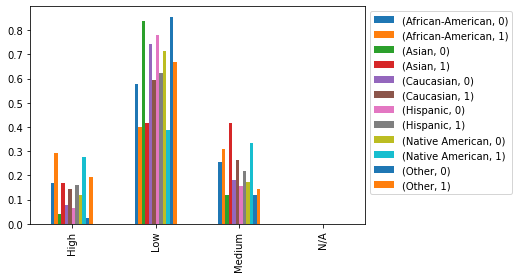

In [20]:
relative_counts.plot.bar().legend(bbox_to_anchor = (1,1))

In [21]:
# this will be your prediction
df['scored_high'] = 0 + (df.score_text == 'High')
df.head()

race  is_violent_recid agency_text score_text  scored_high
0      Other                 0    PRETRIAL        Low            0
1      Other                 0    PRETRIAL        Low            0
2      Other                 0    PRETRIAL        Low            0
3  Caucasian                 0    PRETRIAL        Low            0
4  Caucasian                 0    PRETRIAL     Medium            0

In [22]:
from statsmodels.formula.api import logit

# this will be the model you used to generate scores
model = logit('scored_high ~ C(race) + is_violent_recid + agency_text', df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.365167
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            scored_high   No. Observations:                37578
Model:                          Logit   Df Residuals:                    37568
Method:                           MLE   Df Model:                            9
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                 0.04752
Time:                        22:28:30   Log-Likelihood:                -13722.
converged:                       True   LL-Null:                       -14407.
Covariance Type:            nonrobust   LLR p-value:                3.681e-289
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.9779      0.230     -4.248      0.000      -1.429      -0.527
C(race)[T.Asian]              -1.4142      0.343     -4.122      0.000      -2.087      -0.742
C(race)[T.Caucasian]          -0.8806      0.038    -23.374      0.000      -0.954      -0.807
C(race)[T.Hispanic]           -1.0405      0.069    -15.008      0.000      -1.176      -0.905
C(race)[T.Native American]    -0.3605      0.256     -1.406      0.160      -0.863       0.142
C(race)[T.Other]              -1.7172      0.119    -14.478      0.000      -1.950      -1.485
agency_text[T.DRRD]            0.2336      0.294      0.795      0.427      -0.342       0.809
agency_text[T.PRETRIAL]       -0.6537      0.231     -2.836      0.005      -1.105      -0.202
agency_text[T.Probation]      -0.2184      0.241     -0.905      0.366      -0.692       0.255
is_violent_recid               0.7479      0.045     16.515      0.000       0.659       0.837
==============================================================================================
"""

In [23]:
# you can generate real-valued scores in this way

score = model.predict(df)
score

0        0.033935
1        0.033935
2        0.033935
3        0.075014
4        0.075014
           ...   
37573    0.075014
37574    0.075014
37575    0.045402
37576    0.045402
37577    0.045402
Length: 37578, dtype: float64

## Fairness

#### *Some of this code was inspired by my own work for another class this quarter; CSE 146 - Ethics and Algorithms. Adaptations and changes have been made accordingly to avoid copying verbatim.

In [24]:
df.shape

(37578, 5)

In [25]:
Y = pd.DataFrame(score, columns=['scores'])
R = df['scored_high']
df.shape

(37578, 5)

In [26]:
df.shape

(37578, 5)

In [27]:
Y = Y['scores']

In [28]:
data = pd.concat([df,Y],1)
data

race  is_violent_recid agency_text score_text  scored_high  \
0          Other                 0    PRETRIAL        Low            0   
1          Other                 0    PRETRIAL        Low            0   
2          Other                 0    PRETRIAL        Low            0   
3      Caucasian                 0    PRETRIAL        Low            0   
4      Caucasian                 0    PRETRIAL     Medium            0   
...          ...               ...         ...        ...          ...   
37573  Caucasian                 0    PRETRIAL        Low            0   
37574  Caucasian                 0    PRETRIAL     Medium            0   
37575      Asian                 0    PRETRIAL        Low            0   
37576      Asian                 0    PRETRIAL        Low            0   
37577      Asian                 0    PRETRIAL        Low            0   

         scores  
0      0.033935  
1      0.033935  
2      0.033935  
3      0.075014  
4      0.075014  
...         ...  
37573  0.075014  
37574  0.075014  
37575  0.045402  
37576  0.045402  
37577  0.045402  

[37578 rows x 6 columns]

In [29]:
df_black = pd.DataFrame(data.loc[data['race']=='African-American']).reset_index()
df_white = pd.DataFrame(data.loc[data['race']=='Caucasian']).reset_index()

R_black = df_black['scored_high']
R_white = df_white['scored_high']

Y_black = df_black['scores']
Y_white = df_white['scores']

In [30]:
(Y_white.size,Y_black.size,R_white.size, R_black.size)

(12771, 18978, 12771, 18978)

### (a) Independence

In [31]:
p_black = np.count_nonzero(df_black['scored_high'])/df_black.shape[0]
p_white = np.count_nonzero(df_white['scored_high'])/df_white.shape[0]

In [32]:
p_white/p_black

0.44770652895999163

### (b) Separation

In [33]:
def true_positive_rate(y, r):
    tp = 1
    fn = 1
    for i in range(0, y.size):
        if y[i] == 1:
            if r[i] == 1:
                tp  += 1
            else:
                fn += 1
    return tp/(tp+fn)

def false_positive_rate(y, r):
    tn = 1 
    fp = 1
    for i in range(0, y.size):
        if y[i] == 0:
            if r[i] == 0:
                tn  += 1
            else:
                fp += 1
    return fp/(tn+fp)

#### i. Separation

In [34]:
def thresh_pred(panda, thresh):
    panda_ = panda.copy()
    for i in range(0, panda.size):
        if panda[i] <= thresh:
            panda_[i] = 0
        else:
            panda_[i] = 1
    return panda_

Y_ = thresh_pred(Y, 0.5)
tpr = true_positive_rate(Y_,R)
fpr = false_positive_rate(Y_,R)

(tpr,fpr)

(0.5172413793103449, 0.1281655260565068)

In [35]:
def roc(y, r):
    tpr = np.zeros(100)
    fpr = np.zeros(100)
    for i in range(0, 100):
        y_ = thresh_pred(y,i/100)
        fpr[i]    = false_positive_rate(y_,r)
        tpr[i]    = true_positive_rate(y_,r)
    return tpr, fpr

In [36]:
roc_curve = roc(Y,R)
roc_curve

(array([0.12844598, 0.12844598, 0.12844598, 0.12844598, 0.13396512,
        0.13435652, 0.13440194, 0.14076918, 0.1772572 , 0.1772572 ,
        0.17826825, 0.17822311, 0.17928307, 0.18015941, 0.18013358,
        0.18199916, 0.18192298, 0.28187919, 0.28130543, 0.28055754,
        0.28055754, 0.28051855, 0.28082192, 0.2808418 , 0.29100046,
        0.29100046, 0.29100046, 0.29100046, 0.29168624, 0.29168624,
        0.32512315, 0.32512315, 0.32512315, 0.328     , 0.328     ,
        0.328     , 0.328     , 0.328     , 0.328     , 0.46875   ,
        0.46875   , 0.46875   , 0.46875   , 0.46875   , 0.46875   ,
        0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
        0.51724138, 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5 

In [37]:
# A is Caucasian
# B is African American

tpr_A, fpr_A = roc(Y_white, R_white)
tpr_B, fpr_B = roc(Y_black, R_black)

(tpr_A, fpr_A, tpr_B, fpr_B)

(array([0.08126517, 0.08126517, 0.08126517, 0.08126517, 0.08126517,
        0.08126517, 0.08126517, 0.08126517, 0.13926042, 0.13926042,
        0.13926042, 0.13926042, 0.14634146, 0.14634146, 0.1443418 ,
        0.22641509, 0.22641509, 0.30434783, 0.30434783, 0.30434783,
        0.30434783, 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5 

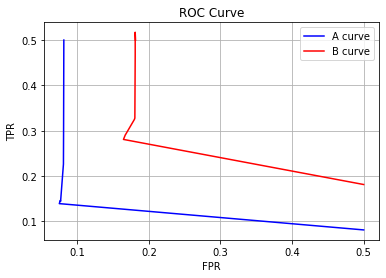

In [38]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr_A, tpr_A, color='blue', label='A curve')
plt.plot(fpr_B, tpr_B, color='red' , label='B curve')
plt.grid(True)

plt.legend()

plt.show()

#### ii. Active Separation Post-Processing

In [39]:
min_A_thresh = 1
min_B_thresh = 1
min_error = 1
for j in range(0 , 100):
    for i in range (0 , 100):
        separation_error = (abs(tpr_A[i]-tpr_B[j])+abs(fpr_A[i]-fpr_B[j]))
        if min_error > separation_error:
            min_error = separation_error
            min_A_thresh = i/100
            min_B_thresh = j/100

In [40]:
(min_A_thresh, min_B_thresh)

(0.17, 0.28)